Step 1: Load the Titanic Dataset

In [5]:
import pandas as pd


df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


Step 2: Handle Missing Values

In [6]:

df.loc[:, "Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

print("Missing values in 'Embarked' handled successfully without warnings.")


Missing values in 'Embarked' handled successfully without warnings.


Step 3: Encode Categorical Features (Sex & Embarked)

In [7]:

df["Sex"] = df["Sex"].map({"male": 1, "female": 0})

print("Encoded 'Sex' column successfully.")


Encoded 'Sex' column successfully.


One-Hot Encode 'Embarked' Column

In [8]:
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(sparse_output=False, drop="first")
encoded_embarked = encoder.fit_transform(df[["Embarked"]])


embarked_df = pd.DataFrame(encoded_embarked, columns=encoder.get_feature_names_out(["Embarked"]))


df = pd.concat([df, embarked_df], axis=1).drop(columns=["Embarked"])

print("One-hot encoding applied to 'Embarked' column successfully.")


One-hot encoding applied to 'Embarked' column successfully.


Step 4: Scale Numerical Features (Age & Fare)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


numerical_columns = ["Age", "Fare"]


df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print("Feature scaling applied to 'Age' and 'Fare' successfully.")


Feature scaling applied to 'Age' and 'Fare' successfully.


Step 5: Handle Outliers (Fare Column)

In [10]:

Q1 = df["Fare"].quantile(0.25)
Q3 = df["Fare"].


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df["Fare"] >= lower_bound) & (df["Fare"] <= upper_bound)]

print("Outliers in 'Fare' removed successfully.")


Outliers in 'Fare' removed successfully.


Step 6: Save Processed Data

In [11]:

df.to_csv("titanic_processed.csv", index=False)

print("Data preprocessing complete. Processed file saved as 'titanic_processed.csv'.")


Data preprocessing complete. Processed file saved as 'titanic_processed.csv'.


Exploratory Data Analysis (EDA) on Processed Titanic Data

Step 1: Load the Processed Dataset

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load processed Titanic dataset
df = pd.read_csv("titanic_processed.csv")


print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  775 non-null    int64  
 1   Survived     775 non-null    int64  
 2   Pclass       775 non-null    int64  
 3   Name         775 non-null    object 
 4   Sex          775 non-null    int64  
 5   Age          613 non-null    float64
 6   SibSp        775 non-null    int64  
 7   Parch        775 non-null    int64  
 8   Ticket       775 non-null    object 
 9   Fare         775 non-null    float64
 10  Cabin        114 non-null    object 
 11  Embarked_Q   775 non-null    float64
 12  Embarked_S   775 non-null    float64
dtypes: float64(4), int64(6), object(3)
memory usage: 78.8+ KB
None
       PassengerId    Survived     Pclass         Sex         Age       SibSp  \
count   775.000000  775.000000  775.00000  775.000000  613.000000  775.000000   
mean    445.806452    0.339355    2

Step 2: Check Survival Rate

<ipython-input-13-ec296402cbf7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=df, palette="coolwarm")


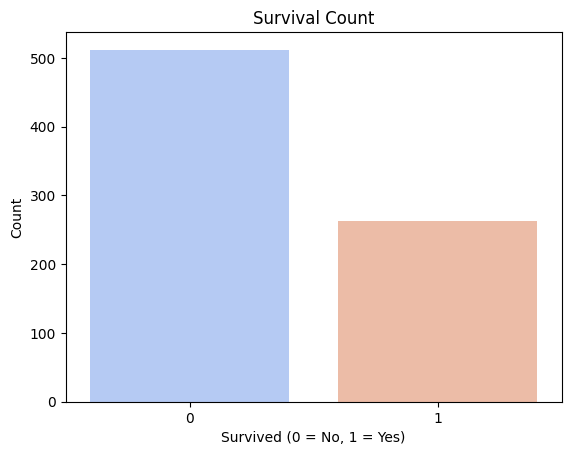

Survival Rate: 33.94%


In [13]:

sns.countplot(x="Survived", data=df, palette="coolwarm")
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Print survival rate
survival_rate = df["Survived"].mean() * 100
print(f"Survival Rate: {survival_rate:.2f}%")


Step 3: Survival Rate by Gender

<ipython-input-14-9d8a1a092e38>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Sex", y="Survived", data=df, palette="pastel")


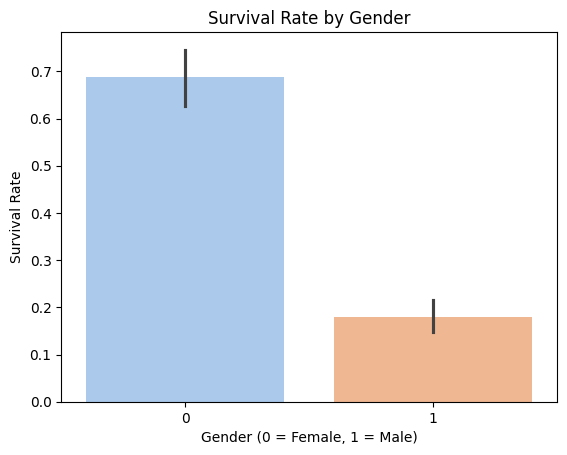

In [14]:
# Group survival rate by Sex
sns.barplot(x="Sex", y="Survived", data=df, palette="pastel")
plt.title("Survival Rate by Gender")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.ylabel("Survival Rate")
plt.show()
